In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import classification_report

%matplotlib inline

In [2]:
creditcard_df = pd.read_excel('default of credit card clients.xls', header=1) #skip the first row (skiprows=None) 
creditcard_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
creditcard_df.columns = [x.title() for x in creditcard_df.columns] #Capital letter for the first letter
creditcard_df = creditcard_df.rename(index=str, columns={"Pay_0": "Pay_1", 'Default Payment Next Month': 'Default payment next month'})
creditcard_df = creditcard_df.drop('Id', axis=1)
print creditcard_df.shape
creditcard_df.head()

(30000, 24)


,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# We could also get overall info for the dataset
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 24 columns):
Limit_Bal                     30000 non-null int64
Sex                           30000 non-null int64
Education                     30000 non-null int64
Marriage                      30000 non-null int64
Age                           30000 non-null int64
Pay_1                         30000 non-null int64
Pay_2                         30000 non-null int64
Pay_3                         30000 non-null int64
Pay_4                         30000 non-null int64
Pay_5                         30000 non-null int64
Pay_6                         30000 non-null int64
Bill_Amt1                     30000 non-null int64
Bill_Amt2                     30000 non-null int64
Bill_Amt3                     30000 non-null int64
Bill_Amt4                     30000 non-null int64
Bill_Amt5                     30000 non-null int64
Bill_Amt6                     30000 non-null int64
Pay_Amt1                     

In [5]:
# class distribution
creditcard_df.groupby('Default payment next month').size()

Default payment next month
0    23364
1     6636
dtype: int64

In [6]:
creditcard_df.groupby(['Sex', 'Default payment next month']).size()

Sex  Default payment next month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
dtype: int64

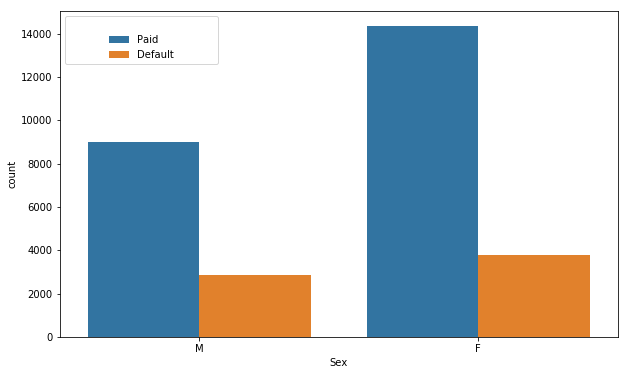

In [7]:
# library and data
fig = plt.figure(figsize=(10,6))

sex = creditcard_df['Sex'].astype('category').cat.rename_categories(['M', 'F'])

o = sns.countplot(sex, hue="Default payment next month", data=creditcard_df)

leg = o.get_legend()
#leg.set_title("Target")
labs = leg.texts
labs[0].set_text("Paid")
labs[1].set_text("Default")
leg.get_title().set_color('white')

plt.show()

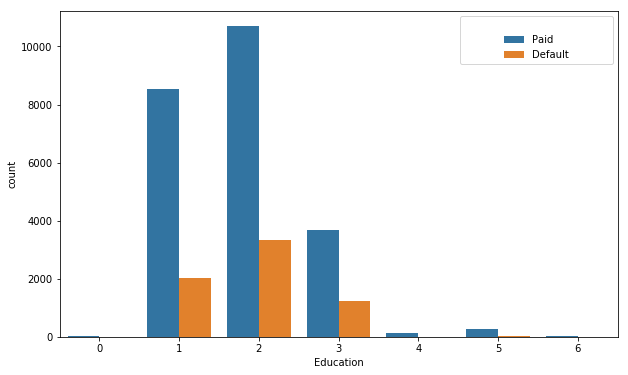

In [8]:
# library and data
fig = plt.figure(figsize=(10,6))

p = sns.countplot(creditcard_df['Education'], hue="Default payment next month", data=creditcard_df)

leg = p.get_legend()
#leg.set_title("Target")
labs = leg.texts
labs[0].set_text("Paid")
labs[1].set_text("Default")
leg.get_title().set_color('white')

plt.show()

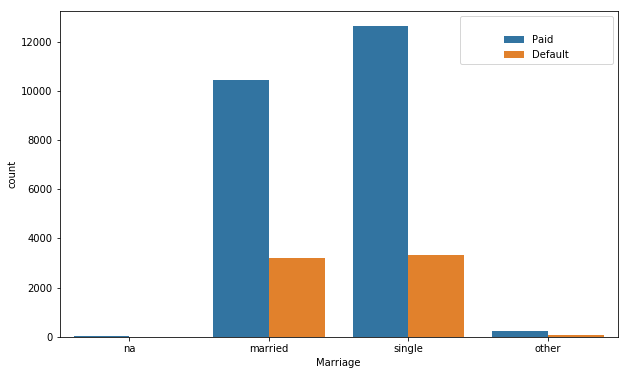

In [9]:
fig = plt.figure(figsize=(10,6))

marriage = creditcard_df['Marriage'].astype('category').cat.rename_categories(['na', 'married', 'single', 'other'])

q = sns.countplot(marriage, hue="Default payment next month", data=creditcard_df)

leg = q.get_legend()
#leg.set_title("Target")
labs = leg.texts
labs[0].set_text("Paid")
labs[1].set_text("Default")
leg.get_title().set_color('white')

plt.show()

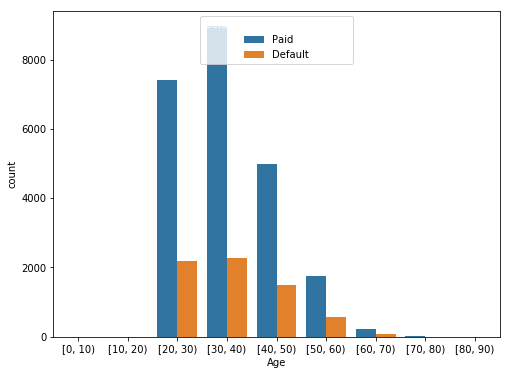

In [10]:
Age_cat = pd.cut(creditcard_df['Age'], range(0, 100, 10), right=False)

fig = plt.figure(figsize=(8,6))

r = sns.countplot(Age_cat, hue="Default payment next month", data=creditcard_df)

leg = r.get_legend()
#leg.set_title("Target")
labs = leg.texts
labs[0].set_text("Paid")
labs[1].set_text("Default")
leg.get_title().set_color('white')

plt.show()

In [11]:
new_df = pd.DataFrame({'Age': Age_cat})

In [12]:
creditcard_df.update(new_df)

In [13]:
creditcard_df.head()

,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default payment next month
0,20000,2,2,1,"[20, 30)",2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,"[20, 30)",-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,"[30, 40)",0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,"[30, 40)",0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,"[50, 60)",-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
creditcard_df.groupby('Age').size()

Age
[20, 30)     9618
[30, 40)    11238
[40, 50)     6464
[50, 60)     2341
[60, 70)      314
[70, 80)       25
dtype: int64

In [15]:
le = preprocessing.LabelEncoder()

creditcard_df['Age'] = le.fit_transform(creditcard_df['Age'])

In [16]:
creditcard_df.head()

,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default payment next month
0,20000,2,2,1,0,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,0,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,1,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,1,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,3,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
pattern = re.compile("^Pay_[0-9]+$")
pay_status_columns = [ x for x in creditcard_df.columns if (pattern.match(x))]
creditcard_df[pay_status_columns].head(10)

,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,-1,-1,0,0,-1
8,0,0,2,0,0,0
9,-2,-2,-2,-2,-1,-1


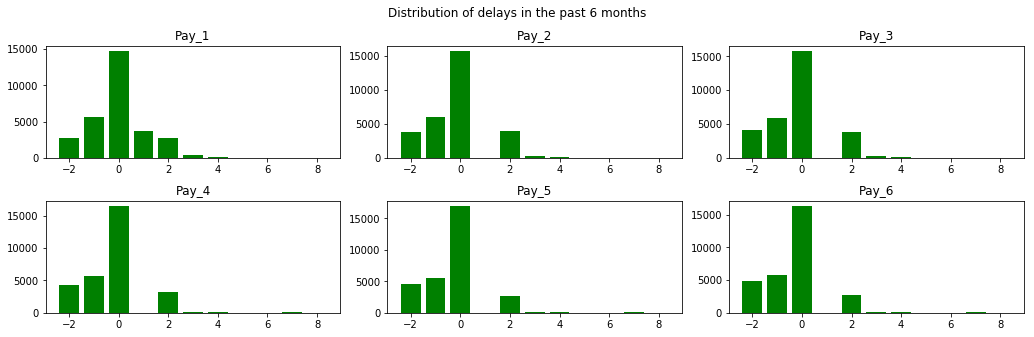

In [18]:
# pay status columns
fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of delays in the past 6 months')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = creditcard_df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='g')
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

In [19]:
# bill columns
pattern = re.compile("^Bill_Amt[0-9]+$")
bill_columns = [ x for x in creditcard_df.columns if (pattern.match(x))]
creditcard_df[bill_columns].describe()

,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [20]:
creditcard_df[bill_columns].head(10)

,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
7,11876,380,601,221,-159,567
8,11285,14096,12108,12211,11793,3719
9,0,0,0,0,13007,13912


In [21]:
# pay status columns
pattern = re.compile("^Pay_Amt[0-9]+$")
pay_amount_columns = [ x for x in creditcard_df.columns if (pattern.match(x))]
creditcard_df[pay_amount_columns].describe()

,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [22]:
creditcard_df[pay_amount_columns].head(10)

,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
5,2500,1815,657,1000,1000,800
6,55000,40000,38000,20239,13750,13770
7,380,601,0,581,1687,1542
8,3329,0,432,1000,1000,1000
9,0,0,0,13007,1122,0


In [23]:
creditcard_df['Limit_Bal'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: Limit_Bal, dtype: float64

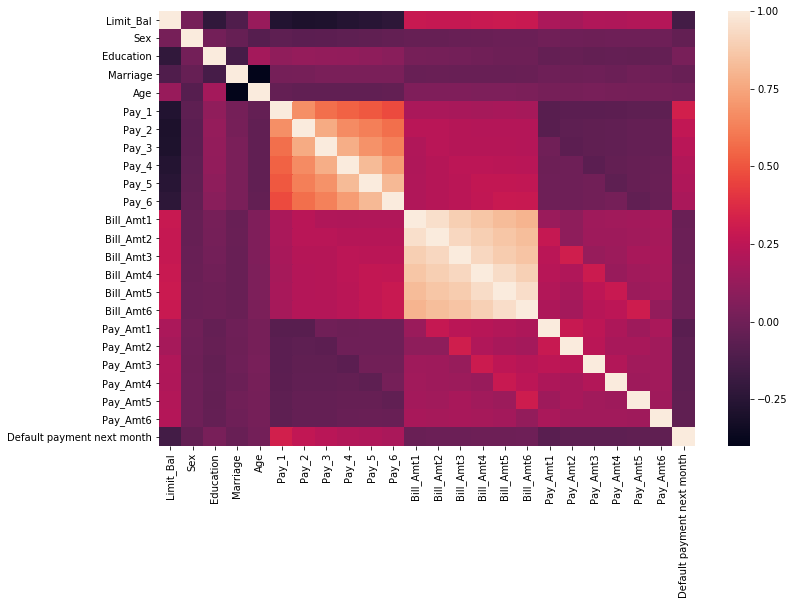

In [24]:
plt.subplots(figsize=(12,8))

corr = creditcard_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [25]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default payment next month
Limit_Bal,1,0.025,-0.22,-0.11,0.13,-0.27,-0.3,-0.29,-0.27,-0.25,-0.24,0.29,0.28,0.28,0.29,0.3,0.29,0.2,0.18,0.21,0.2,0.22,0.22,-0.15
Sex,0.025,1,0.014,-0.031,-0.084,-0.058,-0.071,-0.066,-0.06,-0.055,-0.044,-0.034,-0.031,-0.025,-0.022,-0.017,-0.017,-0.00024,-0.0014,-0.0086,-0.0022,-0.0017,-0.0028,-0.04
Education,-0.22,0.014,1,-0.14,0.17,0.11,0.12,0.11,0.11,0.098,0.082,0.024,0.019,0.013,-0.00045,-0.0076,-0.0091,-0.037,-0.03,-0.04,-0.038,-0.04,-0.037,0.028
Marriage,-0.11,-0.031,-0.14,1,-0.4,0.02,0.024,0.033,0.033,0.036,0.034,-0.023,-0.022,-0.025,-0.023,-0.025,-0.021,-0.006,-0.0081,-0.0035,-0.013,-0.0012,-0.0066,-0.024
Age,0.13,-0.084,0.17,-0.4,1,-0.037,-0.046,-0.048,-0.045,-0.05,-0.045,0.053,0.051,0.05,0.048,0.045,0.042,0.023,0.021,0.029,0.021,0.019,0.02,0.015
Pay_1,-0.27,-0.058,0.11,0.02,-0.037,1,0.67,0.57,0.54,0.51,0.47,0.19,0.19,0.18,0.18,0.18,0.18,-0.079,-0.07,-0.071,-0.064,-0.058,-0.059,0.32
Pay_2,-0.3,-0.071,0.12,0.024,-0.046,0.67,1,0.77,0.66,0.62,0.58,0.23,0.24,0.22,0.22,0.22,0.22,-0.081,-0.059,-0.056,-0.047,-0.037,-0.037,0.26
Pay_3,-0.29,-0.066,0.11,0.033,-0.048,0.57,0.77,1,0.78,0.69,0.63,0.21,0.24,0.23,0.23,0.23,0.22,0.0013,-0.067,-0.053,-0.046,-0.036,-0.036,0.24
Pay_4,-0.27,-0.06,0.11,0.033,-0.045,0.54,0.66,0.78,1,0.82,0.72,0.2,0.23,0.24,0.25,0.24,0.24,-0.0094,-0.0019,-0.069,-0.043,-0.034,-0.027,0.22
Pay_5,-0.25,-0.055,0.098,0.036,-0.05,0.51,0.62,0.69,0.82,1,0.82,0.21,0.23,0.24,0.27,0.27,0.26,-0.0061,-0.0032,0.0091,-0.058,-0.033,-0.023,0.2


In [26]:
Y = creditcard_df['Default payment next month']
X = creditcard_df.drop('Default payment next month', axis=1)

clf = RandomForestClassifier()
clf.fit(X,Y)

# Estimate the importance of each features
feature_import = pd.DataFrame(data=clf.feature_importances_, index=X.columns.values, columns=['values'])
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.transpose()

,Pay_1,Limit_Bal,Bill_Amt1,Pay_2,Bill_Amt2,Bill_Amt3,Pay_Amt1,Bill_Amt6,Bill_Amt4,Bill_Amt5,...,Pay_Amt2,Pay_Amt5,Pay_4,Pay_5,Age,Pay_3,Education,Pay_6,Marriage,Sex
values,0.073697,0.068292,0.065561,0.056823,0.05603,0.055375,0.054031,0.05372,0.053684,0.05227,...,0.047672,0.043062,0.027353,0.026796,0.025759,0.023712,0.022411,0.021926,0.01464,0.013342


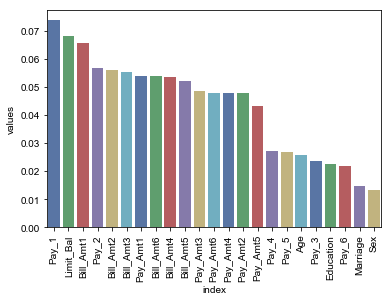

In [27]:
feature_import.reset_index(level=0, inplace=True)
sns.barplot(x='index', y='values', data=feature_import, palette='deep')
sns.set(rc={'figure.figsize':(18,8)}) #font_scale=3
plt.xticks(rotation=90)
plt.show()

In [28]:
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

In [29]:
# Split-out validation dataset
Y = creditcard_df['Default payment next month']
X_unscale = creditcard_df.drop('Default payment next month', axis=1)

scale = StandardScaler()

X = preprocessing.scale(X_unscale)

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [30]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.810958 (0.009393)
LDA: 0.811708 (0.008820)
KNN: 0.790792 (0.007485)
DT: 0.725542 (0.012463)
NB: 0.674167 (0.036476)
RF: 0.803208 (0.007842)


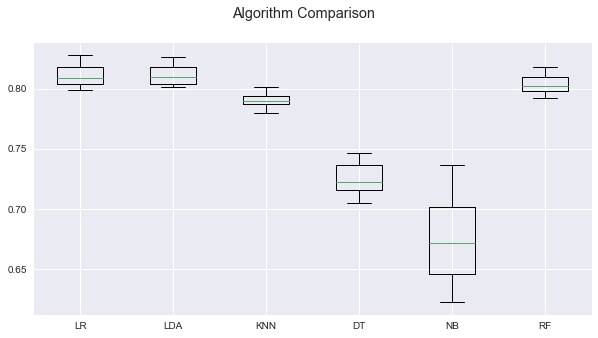

In [31]:
# Compare Algorithms

fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

In [34]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=14)
    plt.show()

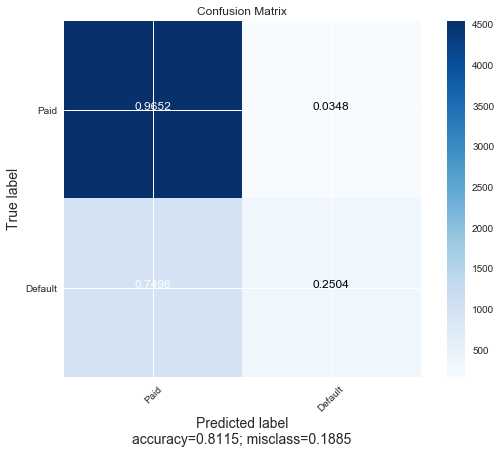

In [35]:
plot_confusion_matrix(cm           = np.array([[4546, 164],
                                               [ 967, 323]]),
                     
                      normalize    = True, 
                      target_names = ['Paid', 'Default'],
                      title        = "Confusion Matrix")